In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn


In [87]:
data = pd.read_csv('StudentsPerformance.csv')

In [88]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [89]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [90]:
data.shape

(1000, 8)

In [91]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [92]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [93]:
student = data.drop(['race/ethnicity','parental level of education'],axis = 1)

In [94]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [95]:
corelation = student.corr()

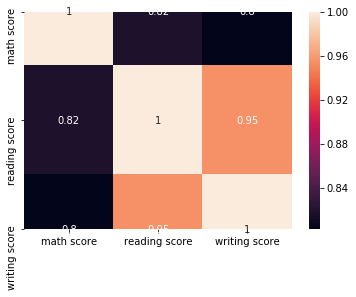

In [96]:
sn.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)
plt.show()

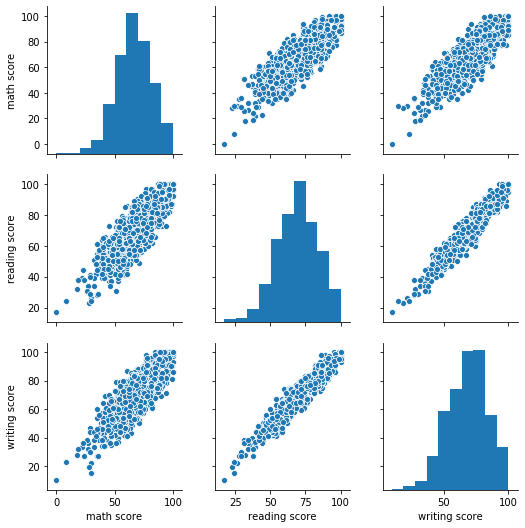

In [97]:
sn.pairplot(student)

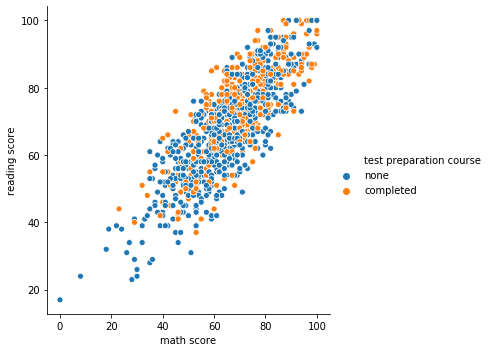

In [98]:
sn.relplot(data=student,x='math score',y='reading score',hue='test preparation course')

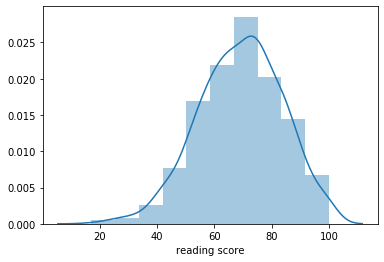

In [99]:
sn.distplot(student['reading score'],bins=10)

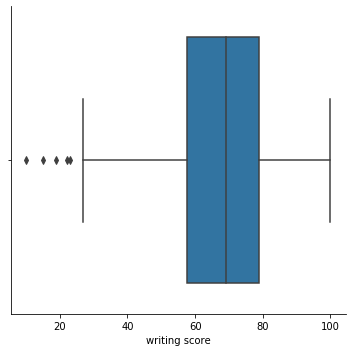

In [100]:
sn.catplot(x='writing score',kind='box',data=student)

In [101]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [233]:
bins = [0,30,40,50,60,70,100]
grades = [0,1,2,3,4,5]#5='A',4='B',3='C',2='D',1='E',0='F'
student['math_score_range'] = pd.cut(student['math score'],bins,labels=grades)

In [234]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score,math_score_range
0,female,standard,none,72,72,74,5
1,female,standard,completed,69,90,88,4
2,female,standard,none,90,95,93,5
3,male,free/reduced,none,47,57,44,2
4,male,standard,none,76,78,75,5


In [235]:
student.dropna(how ='any',inplace=True)

In [276]:
student['math_score_range'].isnull().sum()

0

In [277]:
from sklearn.linear_model import LinearRegression

In [282]:
x = student[['reading score','writing score']]
y = student[['math score']]

reg = LinearRegression()
reg_fit = reg.fit(x, y)
predicted = reg_fit.predict(x)
# plt.plot(x,predicted,color='red')
# plt.scatter(x,y)
# plt.show()

In [283]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(reg,x,y,cv=10)

In [284]:
print(score.mean())

0.6600925707768086
